# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    # Compute SVD on the training data
    U_train, S_train, Vt_train = np.linalg.svd(X_train, full_matrices=False)
    
    # Reduce dimensions
    U_train_reduced = U_train[:, :n_components]
    S_train_reduced = S_train[:n_components]
    Vt_train_reduced = Vt_train[:n_components, :]
    
    # Project training data to reduced dimensions
    X_train_reduced = np.dot(U_train_reduced, np.diag(S_train_reduced))
    
    # Project test data to reduced dimensions using the same Vt
    X_test_reduced = np.dot(X_test, Vt_train_reduced.T)
    
    return X_train_reduced, X_test_reduced

# Example usage of apply_svd_custom function
n_components = 50  # You can change this value to explore different numbers of components
X_train_reduced, X_test_reduced = apply_svd_custom(X_train, X_test, n_components)

print("SVD reduction completed.")

SVD reduction completed.


## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8020, Training time: 0.4312 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9085, Training time: 6.2753 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 25.5554 seconds
Applying custom SVD with 200 components...
SVD components: 200, Accuracy: 0.9206, Training time: 72.9238 seconds
Applying custom SVD with 300 components...
SVD components: 300, Accuracy: 0.9205, Training time: 124.9771 seconds
Applying custom SVD with 400 components...
SVD components: 400, Accuracy: 0.9195, Training time: 223.9367 seconds
Applying custom SVD with 500 components...
SVD components: 500, Accuracy: 0.9205, Training time: 279.7611 seconds


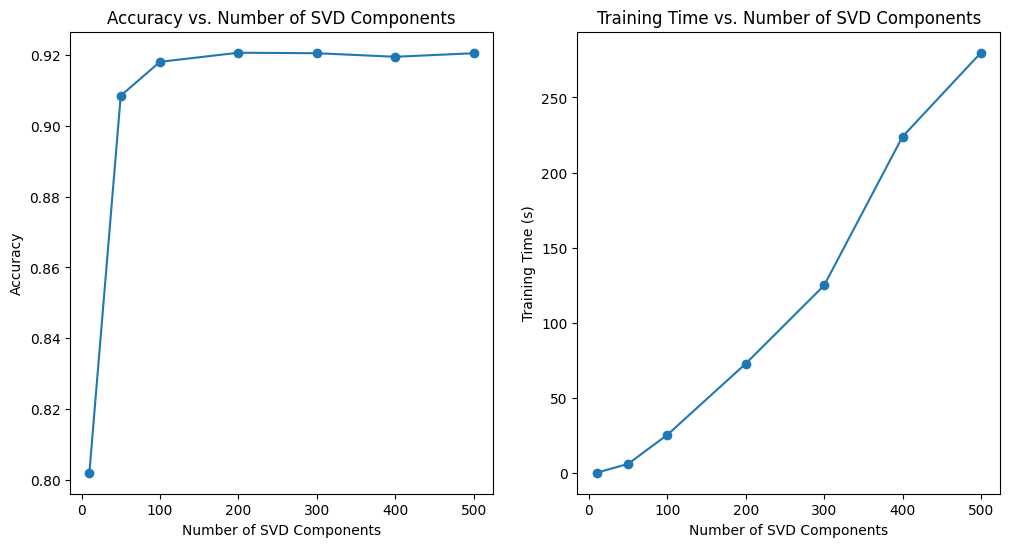

In [4]:
# Define the number of SVD components to experiment with
svd_components = [10, 50, 100, 200, 300, 400, 500]

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the results
    results.append((n_components, accuracy, training_time))
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# Plot results
components, accuracies, times = zip(*results)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of SVD Components')

plt.subplot(1, 2, 2)
plt.plot(components, times, marker='o')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (s)')
plt.title('Training Time vs. Number of SVD Components')

plt.show()

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


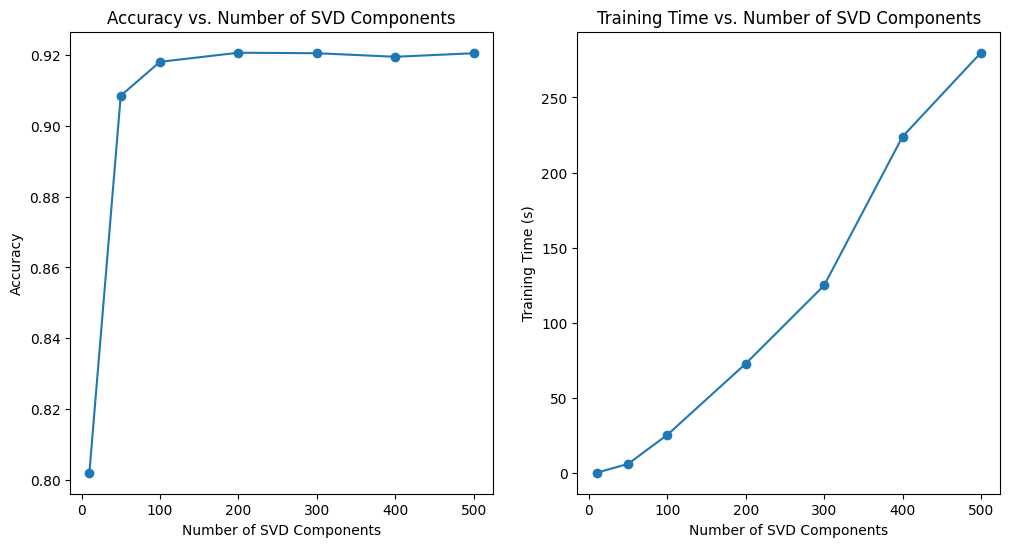

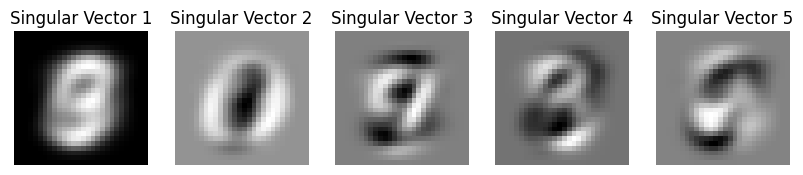

In [5]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

# Plot results
components, accuracies, times = zip(*results)
plt.figure(figsize=(12, 6))

# Plot accuracy vs. number of SVD components
plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of SVD Components')

# Plot training time vs. number of SVD components
plt.subplot(1, 2, 2)
plt.plot(components, times, marker='o')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (s)')
plt.title('Training Time vs. Number of SVD Components')

plt.show()

# Visualize top 5 singular vectors
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
top_singular_vectors = Vt[:5, :]

plt.figure(figsize=(10, 2))
for i, singular_vector in enumerate(top_singular_vectors):
    plt.subplot(1, 5, i + 1)
    plt.imshow(singular_vector.reshape(28, 28), cmap='gray')
    plt.title(f'Singular Vector {i+1}')
    plt.axis('off')
plt.show()

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

The results of our analysis demonstrate a clear relationship between the number of SVD components used and the classification accuracy as well as training time. Initially, accuracy improves as the number of components increases, indicating that more components capture more relevant information essential for classification. However, there is a point of diminishing returns where adding more components does not significantly increase accuracy but continues to increase computational complexity and training time.

The optimal number of components balances both the need for high accuracy and computational efficiency. This balance is crucial for practical applications where both performance and speed are key considerations. The visualization of the top 5 singular vectors gives insight into what features are most significant for classification in our dataset, showing the underlying patterns that SVD emphasizes.

In conclusion, the use of SVD in reducing dimensionality for classification tasks is validated by our findings. By selecting an appropriate number of components, one can achieve a desirable trade-off between accuracy and speed, making this technique suitable for real-time classification tasks in environments where resources are constrained.